In [1]:
%matplotlib inline

from matplotlib import rc
from fourierPSF.fourierModel import *
from mavis import *
rc("text", usetex=False)

In [2]:
path = "/home/frossi/dev/MASTSEL/"
parametersFile = 'mavisParams'
fullPathFilename = path + parametersFile + '.ini'
parser = ConfigParser()
parser.read(fullPathFilename);
wvl = eval(parser.get('PSF_DIRECTIONS', 'ScienceWavelength'))[0]  # lambda
tel_radius = eval(parser.get('PSF_DIRECTIONS', 'psInMas'))/2
pixel_psf = eval(parser.get('telescope', 'TelescopeDiameter'))      # mas

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


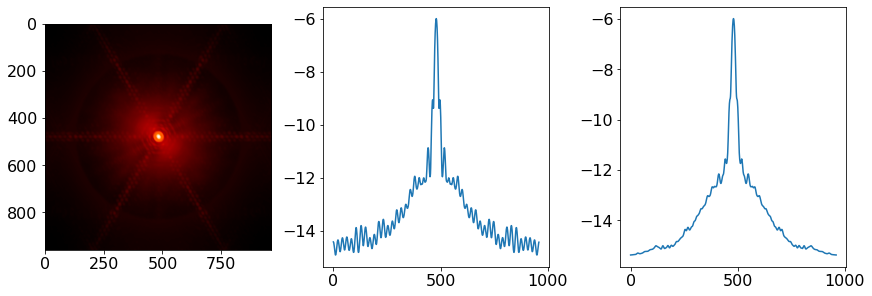

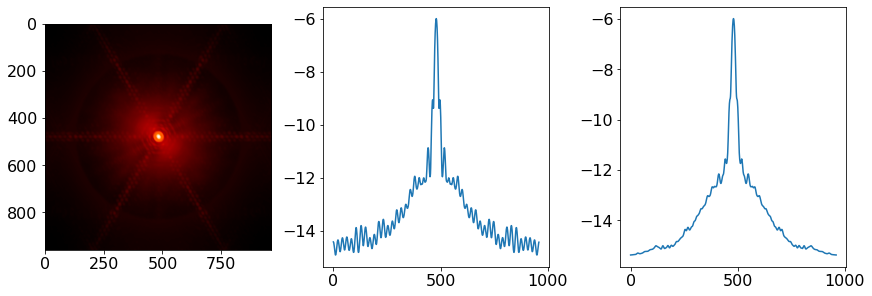

2.168404344971009e-18 -1.734723475976807e-18


In [3]:
N = 960
fao = fourierModel(fullPathFilename, calcPSF=False, verbose=False, display=False)
freq_range = fao.fovInPixel*fao.PSDstep # fao.psf_FoV/fao.wvlRef/206264.8
inputPsf = Field(wvl, N, freq_range, 'rad')
inputPsf.loadSamplingFromFile('./data/convTestData/psf_for_convol.fits')
convolutionKernel = Field(wvl, N, freq_range, 'rad')
convolutionKernel.loadSamplingFromFile('./data/convTestData/fourierkernel_for_convol.fits')
result = Field(wvl, N, freq_range, 'rad')
result.loadSamplingFromFile('./data/convTestData/final_psf_convol.fits')
myresult = convolve(inputPsf, convolutionKernel)
result.standardPlot(True)
myresult.standardPlot(True)
samplingsifference = cp.asnumpy(myresult.sampling) - cp.asnumpy(result.sampling)
print(np.max(samplingsifference), np.min(samplingsifference) )

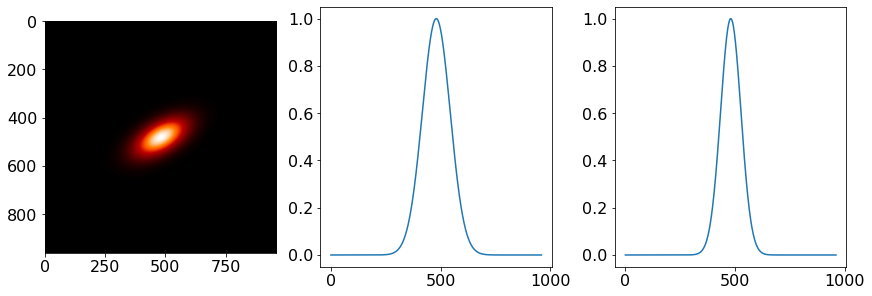

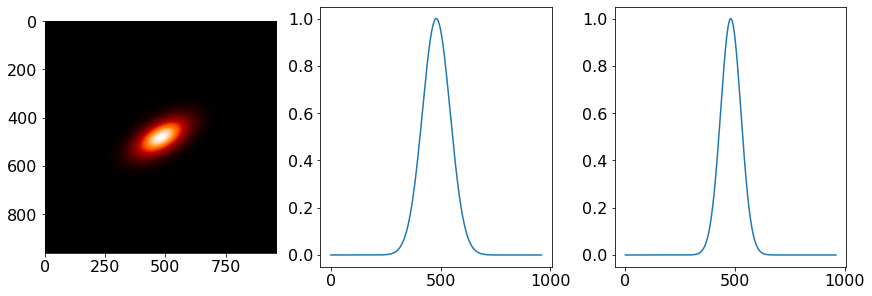

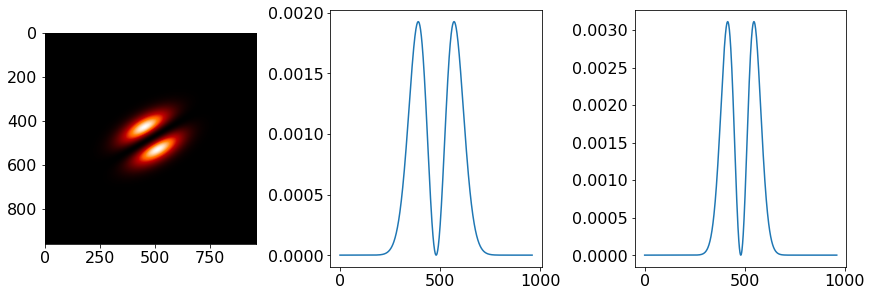

In [32]:
convolutionKernel.standardPlot(False)
myConvKernel = residualToSpectrum([np.pi-1.0472, 4.2661, 2.12330], wvl, N, 1.163545*960 ) # fao.psf_FoV*fao.psInMas
myConvKernel.standardPlot(False)

dd = Field(wvl, N, freq_range, 'rad')

dd.sampling = convolutionKernel.sampling - myConvKernel.sampling
dd.standardPlot(False)
